In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

Pontus Hultkrantz

# [October 2021 : Robot Swimming Trials](https://www.janestreet.com/puzzles/robot-swimming-trials-index/)

<p>As we have <a href="https://www.janestreet.com/puzzles/robot-weightlifting-index/">twice</a> <a href="https://www.janestreet.com/puzzles/robot-tug-of-war-index/">before</a>, we find ourselves engrossed in a robot sports competition. In the Robot Swimming Trials, 3<em>N</em> identical robots compete for <em>N</em> equivalent spots in the finals by swimming <em>N</em> races. Each robot precommits to spending a certain amount of its fuel in each race. After all the races are run, the spots in the finals are given to the winners of the races, moving from the fastest winner to the slowest. (Once a robot wins a race, it is ineligible to win another race.) A robot’s speed is strictly increasing in the amount of fuel it spends, and ties are broken by randomly choosing the winner among the robots that have spent the same amount of fuel.</p>

<p>Mathematically speaking, the 3<em>N</em> robots each submit a strategy, which is an <em>N</em>-tuple of nonnegative real number “bids” summing to 1, representing the fuel burned in each of the <em>N</em> races. The winners of the races are then determined from the highest bid (across all races and all robots) on down, with ties broken randomly. Once a robot wins a race their other bids are deleted, so we are guaranteed to get <em>N</em> distinct qualifiers for the finals.</p>

<p>For example, suppose <em>N</em>=3 and the 3<em>N</em>=9 robots submit their strategies as</p>

<table>
  <thead>
    <tr>
      <th>Robot</th>
      <th>Race 1  </th>
      <th>Race 2  </th>
      <th>Race 3  </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Automatonya  </td>
      <td>0.6</td>
      <td>0.1</td>
      <td>0.3</td>
    </tr>
    <tr>
      <td>Botty</td>
      <td>0.6</td>
      <td>0.3</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>Chroma</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Data</td>
      <td>0.3</td>
      <td>0.5</td>
      <td>0.2</td>
    </tr>
    <tr>
      <td>Electro</td>
      <td>0.2</td>
      <td>0.8</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Fernandroid</td>
      <td>0.4</td>
      <td>0.5</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>Gregulator</td>
      <td>0.5</td>
      <td>0.5</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Hannanobot</td>
      <td>0</td>
      <td>0.9</td>
      <td>0.1</td>
    </tr>
    <tr>
      <td>IO</td>
      <td>0.2</td>
      <td>0.7</td>
      <td>0.1</td>
    </tr>
  </tbody>
</table>

<p>The second race gets resolved first because Chroma’s bid of 1 is the highest overall, and Chroma is declared the winner of that time trial. Next, the first race is resolved because 0.6 is the highest remaining bid (we ignore the 0.9, 0.8, and 0.7 in the second race because it already has a winner). We flip a fair coin to determine who is the winner between Automatonya and Botty; say that Automatonya gets lucky and is declared the winner. Then the third race is decided, and Data is declared the winner, because 0.2 is the highest bid among robots that have not yet won (Automatonya’s 0.3 is ignored).</p>

<p>Over the storied history of the RST, the metagame settled into what was widely believed to be the Nash equilibrium: each robot uniformly randomly selects a race and devotes all of their fuel to it. Let’s call this the <strong>discrete strategy</strong>. However, rumors are circulating that this conventional wisdom is not entirely accurate: for a large enough <em>N</em>, the discrete strategy is not the Nash equilibrium. You’ve been tasked to find two pieces of information:</p>

<p>What is the smallest <em>N</em> for which the trial does <strong>not</strong> have the discrete strategy as the Nash equilibrium?</p>

<p>For this <em>N</em>, if the other 3<em>N</em>-1 robots naively play the discrete
strategy and your robot plays optimally (exploiting this knowledge of
your opponents’ strategies), with what probability <em>p</em> will you make the finals (rounded to 6 significant digits)?</p>

<p>Please submit your answer in the form “<em>N</em>, <em>p</em>”.</p>

## Methodology

Consider $n$ players playing $k$ races.

If all $n$ players are playing the same discrete strategy, due to symmetry they all have the same probability of making the finals, that is $\frac{n}{3n} = \tfrac{1}{3}$.

Now assume the other $n-1$ players are playing the discrete strategy, then the only chance for you to win is
1. You allocate all to one race.
    1. More than you allocated to this race, and ties are broken randomly.
    2. Only you allocted to this race. You win.
2. You allocate to several races.
    1. Any race you allocated to that someone else participates in, you lose since you allocate less than 1.0.
    2. Only you allocated to this race. You win. 

Obviously, 1. is the discrete strategy and identical strategy as your opponents. 2. you win by being the sole player allocating to a race. Hence, you will maximise winning chances by participating with any non-zero value in each race.

Therefore, since you participate in all races, you will make the finals if at least one of the $k$ races has no other players allocating fuel.

The general problem with $m=n-1$ **competitors** and $k$ races can be rephrased as:
**Given $m$ balls and $k$ urns, if all balls are placed into urns at random, what is the probability that at least one urn is empty.**

We will solve that this problem can be solved by any of two methods.

### Method: inclusion-exclusion principle

Let $E_i$ be the event that urn $i$ remains empty. It is clear that $\mathbb{P}(E_i) = \left(\frac{k-1}{k}\right)^m$, i.e. all balls must be put in the other (k-1) urns. Similarly, the probability that any combination of $j$ urns stay empty is $f(j; k, m) := \left(\frac{k-j}{k}\right)^m$. The probability of winning is given by $\mathbb{P}\left(W\right)$, where the winning event $W = \bigcup_{i=1}^k E_i$ is the event that at least one urn is empty.


Using the [inclusion-exclusion formula for probability](https://en.wikipedia.org/wiki/Inclusion%E2%80%93exclusion_principle#In_probability)

k = 2:

\begin{align}
\mathbb{P}(E_1 \cup E_2) &= \mathbb{P}(E_1) + \mathbb{P}(E_2) - \mathbb{P}(E_1 \cap E_2) \\
&= 2 f(1; 2, m) - f(2;2,m).
\end{align}

k = 3:
\begin{align}
\mathbb{P}(E_1\cup E_2\cup E_3)&=\mathbb{P}(E_1)+\mathbb{P}(E_2)+\mathbb{P}(E_3)-\mathbb{P}(E_1\cap E_2)-\mathbb{P}(E_1\cap E_3)-\mathbb{P}(E_2\cap E_3)+\mathbb{P}(E_1\cap E_2\cap E_3) \\
&= 3 f(1;3,m) - 3f(2;3,m) + f(3;3,m).
\end{align}




For general $k$ 
\begin{align}
    \mathbb{P}(W) = \mathbb{P}\left(\bigcup_{i=1}^k E_i\right) = \sum_{i=1}^k (-1)^{i-1} {k \choose i} f(i;k,m).
\end{align}

In the problem statement, we have $N$ races and $3N$ players, so $k=N$, $n=3N$, $m=n-1=3N-1$ which means
\begin{align}
    \mathbb{P}(W) = \sum_{i=1}^N (-1)^{i-1} {N \choose i} \left(1 - \frac{i}{N}\right)^{3N-1}.
\end{align}

We now find
\begin{align}
    N^* &= \min(N : \mathbb{P}(W) > 1/3) = 8, \\
    \mathbb{P}(W)|_{N^*} &= 0.334578.
\end{align}
That is, the smallest number of players needed in order for one player to be better off by switching from the discrete strategy to the new strategy.


### Method: dynamic programming

Again consider a total of $m$ balls and $k$ urns.
Imagine sequentually dropping the balls into the urns, and let $0\leq b \leq n$ be the number of balls dropped so far, and $0\leq u\leq k$ the number of urns that have balls (non-empty). Then there are two possible transitions for the next ball we drop 

1. It falls in a non-emty urn, the number of non-empty urns is unchanged: $P[(b,u) \to (b+1,u)] = u/k$
2. It falls in an emty urn, the number of non-empty urns increases: $P[(b,u) \to (b+1,u+1)]= 1-u/k$

Consider the special cases
1. The first drop has transition: $P[(0,0) \to (1,1)]= 1$
2. No more empty urns ($u=k$): $P[(b,k) \to (b+1,k)]= 1$
3. All balls dropped ($b=m$): no transitions.

Now let $f(b,u)$ be the density for the number of non-empty urns for $b$ balls dropped ($\sum_{u=0}^k f(b,u)=1$), then we have the recursion

\begin{align}
    f(b,u) = 
    \begin{cases}
        1, & \text{if } b=u=0\\
        0, & \text{if } u=0 \text{ or } b<u\\
        \left(1-\frac{u-1}{k}\right)f(b-1, u-1) + \frac{u}{k}f(b-1,u), & \text{otherwise}\\
    \end{cases}
\end{align}
and the probability of having all urns filled is given by $f(m, k)$, such that the probability of at least one empty urn is given by $1-f(m, k)$.

In the problem statement, we have $N$ races and $3N$ players, so $k=N$, $n=3N$, $m=n-1=3N-1$ which means
\begin{align}
    \mathbb{P}(W) = 1-f(3N-1,N),
\end{align}
ans so
\begin{align}
    N^* &= \min(N : \mathbb{P}(W) > 1/3) = 8, \\
    \mathbb{P}(W)|_{N^*} &= 0.334578.
\end{align}

## Simulation

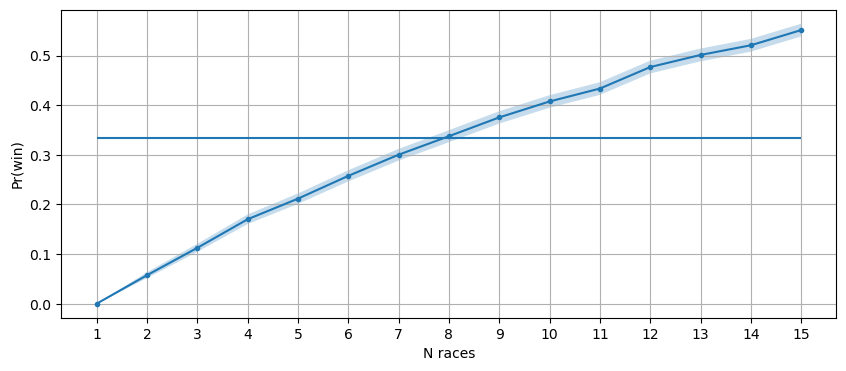

Estimate: N=8, 0.333594 < p < 0.335312


In [3]:
import numpy as np
from scipy import stats
from scipy.special import comb
from matplotlib import pyplot as plt
import numba

@numba.njit(parallel=True)
def mc_win_pr(m, k, nsim):
    wins = 0
    for i in numba.prange(nsim):
        if np.unique(np.random.randint(0, k, size=m)).size < k: # If nbr non-empty races < k, we win.
            wins += 1
    mu_est = wins/nsim
    stdev_est = (mu_est * (1 - mu_est) / nsim)**0.5
    return mu_est, stdev_est

def mc_conf(mu_est, stdev, alpha):
    """ Monte-Carlo confidence """
    c = stats.norm.ppf(1 - alpha / 2)
    return c*stdev

def simulate(n, nsims, alpha):
    mu_est, stdev_est = mc_win_pr(3*n-1, n, nsims)
    return mu_est, mc_conf(mu_est, stdev_est, alpha)

def visualize(xx, yy, yy_err=None):
    fig, axs = plt.subplots(1,1, figsize=(10, 4))
    axs.plot(xx, yy, marker='.')
    if yy_err is not None:
        axs.fill_between(xx, yy-yy_err, yy+yy_err, alpha=0.25)
    axs.set_xlabel('N races'); axs.set_ylabel('Pr(win)')
    axs.hlines(1/3, 1, xx[-1])
    axs.set_xticks(xx)
    axs.grid()
    plt.show()
    return

# Sweep to find where we cross P(Win) = 1/3
NN_races = np.array(range(1, 15+1))
nsims = 10_000
simres = [simulate(N, nsims, alpha=0.01) for N in NN_races]
w_est, w_err = (np.array(e) for e in zip(*simres))

visualize(NN_races, w_est, w_err)

# Ad-hoc guess on correct value N
sup_idx = np.where(np.abs(w_est - 1/3)< w_err)[0][0]
n_sup = NN_races[sup_idx]

# Run with more sims
w_sup_est, w_sup_err = simulate(n_sup, 2_000_000, alpha=0.01)
if w_sup_est-w_sup_err > 1/3:
    n_estimate = n_sup
else:
    n_estimate = [n_sup, n_sup+1]
print(f'Estimate: N={n_estimate}, {w_sup_est-w_sup_err:.6f} < p < {w_sup_est+w_sup_err:.6f}')

## Anlytical solution

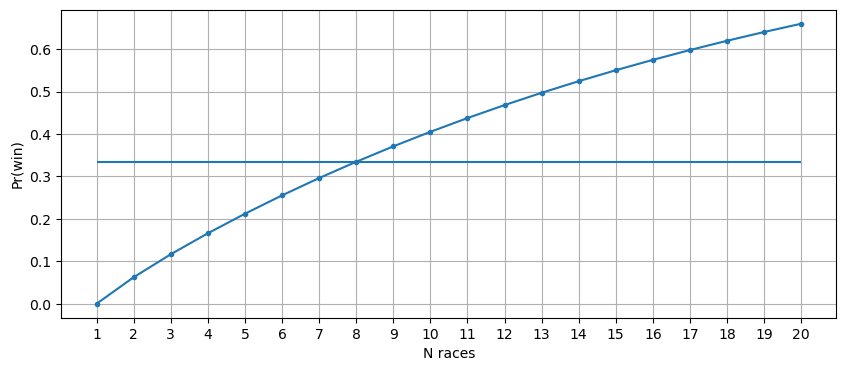

(N,p) = (8, 0.334578)


In [4]:
def balls_in_urns_pmf(m, k):
    f = np.zeros((m+1, k+1))
    f[0,0] = 1.0
    for u in range(1, k+1):
        for b in range(u, m+1):
            f[b, u] = (1-(u-1)/k) * f[b-1, u-1] + u/k * f[b-1, u]
    return f[m]

def pr_emty_urn_dp(m, k):
    pmf = balls_in_urns_pmf(m, k)
    return 1-pmf[k] # =P('at least one emty urn or race')

def pr_empty_urn_inclexcl(m, k):
    return sum((-1)**(i-1) * comb(k, i, exact=True)*(1-i/k)**m for i in range(1,k+1))

def pr_empty_race(N, method='incl-excl'):
    n_competitors = 3*N-1 # 3N players, 3N-1 opponents.
    n_urns = N
    if method=='incl-excl':
        return pr_empty_urn_inclexcl(n_competitors, n_urns)
    elif method=='dp':
        return pr_emty_urn_dp(n_competitors, n_urns)
    else:
        raise ValueError(f'Unknown method {method}')

def strat_winpr(n_races):
    n_competitors = 3*n_races-1 # 3N players, 3N-1 opponents.
    n_urns = n_races
    
    # method : inclusion-exclusion principle
    prwin_inclexcl = pr_empty_urn_inclexcl(n_competitors, n_urns)
    
    # method : dynamic programming
    prwin_dp = pr_emty_urn_dp(n_competitors, n_urns)
    
    assert abs(prwin_inclexcl-prwin_dp)<1e-12, f'incl-excl solution does not equal dp solution. {prwin_inclexcl} vs {prwin_dp}'
    return prwin_inclexcl

# Plot Win Pr WW for valuef of number of races NN
NN = np.array(range(1, 20+1), dtype=int)
WW = np.array([strat_winpr(N) for N in NN])
visualize(NN, WW)

# Find smallest N such that WW>1/3.
bound_idx = np.where(WW > 1/3)[0][0]
N_min = NN[bound_idx]
W_min = WW[bound_idx]

print(f'(N,p) = ({N_min}, {W_min.round(6)})')